# Breast Cancer Classification using Machine Learning

## Task 2: Build a Machine Learning Model

### Objective:
To build a classification model to predict breast cancer recurrence using Logistic Regression.

### Algorithm Used:
Logistic Regression

### Tools Used:
Python, Pandas, Scikit-learn, Matplotlib, Seaborn

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [2]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
0,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
1,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
2,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
3,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
4,'50-59','premeno','25-29','3-5','no','2','right','left_up','yes','no-recurrence-events'


## Add Column Names

In [3]:
columns = [
    "Class","Age","Menopause","Tumor_Size","Inv_Nodes",
    "Node_Caps","Deg_Malig","Breast","Breast_Quad","Irradiat"
]

df.columns = columns
df.head()

,Class,Age,Menopause,Tumor_Size,Inv_Nodes,Node_Caps,Deg_Malig,Breast,Breast_Quad,Irradiat
0,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
1,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
2,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
3,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
4,'50-59','premeno','25-29','3-5','no','2','right','left_up','yes','no-recurrence-events'


## Understand Dataset

In [4]:
df.shape

(285, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        285 non-null    object
 1   Age          285 non-null    object
 2   Menopause    285 non-null    object
 3   Tumor_Size   285 non-null    object
 4   Inv_Nodes    277 non-null    object
 5   Node_Caps    285 non-null    object
 6   Deg_Malig    285 non-null    object
 7   Breast       284 non-null    object
 8   Breast_Quad  285 non-null    object
 9   Irradiat     285 non-null    object
dtypes: object(10)
memory usage: 22.4+ KB


In [6]:
df.describe()

,Class,Age,Menopause,Tumor_Size,Inv_Nodes,Node_Caps,Deg_Malig,Breast,Breast_Quad,Irradiat
count,285,285,285,285,277,285,285,284,285,285
unique,6,3,11,7,2,3,2,5,2,2
top,'50-59','premeno','30-34','0-2','no','2','left','left_low','no','no-recurrence-events'
freq,96,149,60,212,222,130,152,110,217,201


In [7]:
df['Class'].value_counts()

Class
'50-59'    96
'40-49'    89
'60-69'    57
'30-39'    36
'70-79'     6
'20-29'     1
Name: count, dtype: int64

##  Check Missing Values

In [8]:
df.isnull().sum()

Class          0
Age            0
Menopause      0
Tumor_Size     0
Inv_Nodes      8
Node_Caps      0
Deg_Malig      0
Breast         1
Breast_Quad    0
Irradiat       0
dtype: int64

## Convert Text to Numbers (Encoding)

In [9]:
le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [10]:
df.head()

,Class,Age,Menopause,Tumor_Size,Inv_Nodes,Node_Caps,Deg_Malig,Breast,Breast_Quad,Irradiat
0,3,0,2,0,0,0,1,0,0,0
1,3,0,6,0,0,1,0,1,0,1
2,2,2,6,0,1,2,1,1,1,0
3,2,2,5,4,1,1,0,4,0,1
4,3,2,4,4,0,1,1,2,1,0


## Feature Selection

In [11]:
X = df.drop("Class", axis=1)
y = df["Class"]

## Split Dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Model

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Make Prediction

In [15]:
y_pred = model.predict(X_test)

## Evaluate Model

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5964912280701754


In [18]:
print(confusion_matrix(y_test, y_pred))

[[ 0  5  0  0]
 [ 1 18  0  1]
 [ 0  5 12  2]
 [ 0  0  9  4]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.64      0.90      0.75        20
           3       0.57      0.63      0.60        19
           4       0.57      0.31      0.40        13

    accuracy                           0.60        57
   macro avg       0.45      0.46      0.44        57
weighted avg       0.55      0.60      0.55        57



## Visualize Confusion Matrix

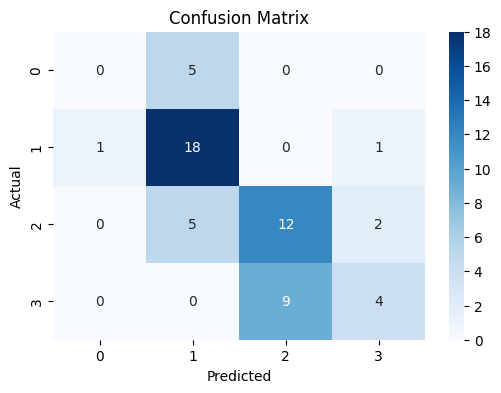

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Conclusion:

• Successfully built classification model using Logistic Regression.

• Performed feature selection and preprocessing.

• Model evaluated using accuracy, confusion matrix, and classification report.

• Model predicts breast cancer recurrence effectively.